# Credit Card Users Churn Prediction

## Background & Context

The Thera bank recently saw a steep decline in the number of users of their credit card, credit cards are a good source of income for banks because of different kinds of fees charged by the banks like annual fees, balance transfer fees, and cash advance fees, late payment fees, foreign transaction fees, and others. Some fees are charged to every user irrespective of usage, while others are charged under specified circumstances.

Customers’ leaving credit cards services would lead bank to loss, so the bank wants to analyze the data of customers and identify the customers who will leave their credit card services and reason for same – so that bank could improve upon those areas

We as a Data scientist at Thera bank need to come up with a classification model that will help the bank improve its services so that customers do not renounce their credit cards

We need to identify the best possible model that will give the required performance

## Objective

Explore and visualize the dataset.
Build a classification model to predict if the customer is going to churn or not
Optimize the model using appropriate techniques
Generate a set of insights and recommendations that will help the bank

## Data Dictionary:
- CLIENTNUM: Client number. Unique identifier for the customer holding the account
- Attrition_Flag: Internal event (customer activity) variable - if the account is closed then "Attrited Customer" else "Existing Customer"
- Customer_Age: Age in Years
- Gender: Gender of the account holder
- Dependent_count: Number of dependents
- Education_Level:  Educational Qualification of the account holder - Graduate, High School, Unknown, Uneducated, College(refers to a college student), Post-Graduate, Doctorate.
- Marital_Status: Marital Status of the account holder
- Income_Category: Annual Income Category of the account holder
- Card_Category: Type of Card
- Months_on_book: Period of relationship with the bank
- Total_Relationship_Count: Total no. of products held by the customer
- Months_Inactive_12_mon: No. of months inactive in the last 12 months
- Contacts_Count_12_mon: No. of Contacts between the customer and bank in the last 12 months
- Credit_Limit: Credit Limit on the Credit Card
- Total_Revolving_Bal: The balance that carries over from one month to the next is the revolving balance
- Avg_Open_To_Buy: Open to Buy refers to the amount left on the credit card to use (Average of last 12 months)
- Total_Trans_Amt: Total Transaction Amount (Last 12 months)
- Total_Trans_Ct: Total Transaction Count (Last 12 months)
- Total_Ct_Chng_Q4_Q1: Ratio of the total transaction count in 4th quarter and the total transaction count in 1st quarter
- Total_Amt_Chng_Q4_Q1: Ratio of the total transaction amount in 4th quarter and the total transaction amount in 1st quarter
- Avg_Utilization_Ratio: Represents how much of the available credit the customer spent


In [1]:
# Course: Ensemble Techniques
# Project: Travel Package Purchase Prediction Project
# Student: Sameer Girolkar
# Date: Jan 7, 2022

In [2]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

<IPython.core.display.Javascript object>

## Initial setup
Let's start by importing the required libraries, setting up some basic configurations for EDA.<br/>
We will also write some basic functions to help us visualize the data.

In [3]:
# Import the required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import json
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    BaggingClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    StackingClassifier,
)
# To be used for missing value imputation
from sklearn.impute import SimpleImputer

from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

from sklearn.linear_model import LogisticRegression

# To undersample and oversample the data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')


<IPython.core.display.Javascript object>

### Functions for EDA and Visualizations

In [4]:
# function to plot histogram and barplot together
def histogram_boxplot(
    data, feature, figsize=(12, 7), kde=False, bins=None, hue=None, element="bars"
):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet", hue=hue
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data,
        x=feature,
        kde=kde,
        ax=ax_hist2,
        bins=bins,
        palette="winter",
        hue=hue,
        element=element,
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, hue=hue, element=element
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")

<IPython.core.display.Javascript object>

In [5]:
# function to create labeled barplots
def labeled_barplot(data, feature, perc=False, n=None, hue=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    hue: Grouping variable
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 5, 5))
    else:
        plt.figure(figsize=(n + 5, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
        hue=hue,
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

<IPython.core.display.Javascript object>

In [6]:
# function to create box-plots by category
def box_plot_by_cat(data, category_col, y, n=None):
    """
    Boxplot by category

    data: dataframe
    category_col: column for which the boxplot will be created
    y: independent variable
    n: no of values to plot
    """
    count = data[category_col].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))
    sns.boxplot(
        x=category_col,
        y=y,
        data=data,
        order=data[category_col].value_counts().index[:n].sort_values(),
    )
    plt.xticks(rotation=90)
    plt.show()

<IPython.core.display.Javascript object>

In [7]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 75)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    ax = tab.plot(kind="bar", stacked=True, figsize=(count + 7, 6))

    for c in ax.containers:
        ax.bar_label(c, label_type="center", size=14, fmt="%.2f")

    plt.legend(loc="upper left", bbox_to_anchor=(1, 1), title=target)
    plt.show()

<IPython.core.display.Javascript object>

In [8]:
# Removes the limit from the number of displayed columns
pd.set_option("display.max_columns", None)

# Let's set the limit of 200 rows max
pd.set_option("display.max_rows", 200)

<IPython.core.display.Javascript object>

In [9]:
# make the graphs look nicer
sns.set(color_codes=True)
sns.set_style("darkgrid")
# light palette for Pivot tables
cm = sns.light_palette("lightblue", as_cmap=True)
sns.set(
    rc={
        "figure.figsize": (15, 15),
        "axes.titlesize": "30",
        "xtick.labelsize": "20",
        "ytick.labelsize": "20",
    }
)

# actually display the graphs instead of generating only the object
%matplotlib inline

<IPython.core.display.Javascript object>

## Overview of the Dataset
Let's now read and observe the data

In [10]:
# Note: I have manually saved the xlsx file as a CSV file using Excel
# Read the data from the file
data = pd.read_csv("BankChurners.csv")

<IPython.core.display.Javascript object>

In [11]:
# lets see how many rows and columns are present in the data
data.shape

(10127, 21)

<IPython.core.display.Javascript object>

CLIENTNUM columns is just an ID and does not contribute any useful information so lets drop it

In [12]:
data.drop("CLIENTNUM", axis=1, inplace=True)

<IPython.core.display.Javascript object>

There are 10127 rows and 21 columns in the original dataset

In [13]:
# Check data types and number of non-null values for each column.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           8608 non-null   object 
 5   Marital_Status            9378 non-null   object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

<IPython.core.display.Javascript object>

### Observations:
- 11 columns are numeric and 6 ar object type
- Education_Level and Marital_Status columns have nulls

In [14]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age              10127.0    46.325960     8.016814    26.0    41.000   
Dependent_count           10127.0     2.346203     1.298908     0.0     1.000   
Months_on_book            10127.0    35.928409     7.986416    13.0    31.000   
Total_Relationship_Count  10127.0     3.812580     1.554408     1.0     3.000   
Months_Inactive_12_mon    10127.0     2.341167     1.010622     0.0     2.000   
Contacts_Count_12_mon     10127.0     2.455317     1.106225     0.0     2.000   
Credit_Limit              10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal       10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy           10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1      10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt           10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct            10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1       10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio     10127.0     0.274894     0.275691     0.0     0.023   

                               50%        75%        max  
Customer_Age                46.000     52.000     73.000  
Dependent_count              2.000      3.000      5.000  
Months_on_book              36.000     40.000     56.000  
Total_Relationship_Count     4.000      5.000      6.000  
Months_Inactive_12_mon       2.000      3.000      6.000  
Contacts_Count_12_mon        2.000      3.000      6.000  
Credit_Limit              4549.000  11067.500  34516.000  
Total_Revolving_Bal       1276.000   1784.000   2517.000  
Avg_Open_To_Buy           3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1         0.736      0.859      3.397  
Total_Trans_Amt           3899.000   4741.000  18484.000  
Total_Trans_Ct              67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1          0.702      0.818      3.714  
Avg_Utilization_Ratio        0.176      0.503      0.999

<IPython.core.display.Javascript object>

In [15]:
data.describe(include="object").T

count unique                top  freq
Attrition_Flag   10127      2  Existing Customer  8500
Gender           10127      2                  F  5358
Education_Level   8608      6           Graduate  3128
Marital_Status    9378      3            Married  4687
Income_Category  10127      6     Less than $40K  3561
Card_Category    10127      4               Blue  9436

<IPython.core.display.Javascript object>

### Observations:
- Some colums look right skewed
- Most customes are Existing Customer
- Most customers are Blue card holders

## Data Preprocessing

In [16]:
data["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

<IPython.core.display.Javascript object>

Let's replace the values with more usable ones

In [17]:
data["Attrition_Flag"].replace(
    {"Existing Customer": 0, "Attrited Customer": 1}, inplace=True
)

<IPython.core.display.Javascript object>

In [18]:
data["Income_Category"].value_counts()

Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
abc               1112
$120K +            727
Name: Income_Category, dtype: int64

<IPython.core.display.Javascript object>

abc is a wrong value and should be treated as null

In [19]:
data["Income_Category"].replace({"abc": np.nan}, inplace=True)

<IPython.core.display.Javascript object>

Some numeric columns can be converted into categories
- Attrition_Flag
- Dependent_count
- Total_Relationship_Count
- Months_Inactive_12_mon
- Contacts_Count_12_mon

In [20]:
for col in [
    "Dependent_count",
    "Total_Relationship_Count",
    "Months_Inactive_12_mon",
    "Contacts_Count_12_mon",
    "Attrition_Flag",
]:
    data[col] = data[col].astype("object")

<IPython.core.display.Javascript object>

In [21]:
data.describe().T

count         mean          std     min       25%  \
Customer_Age           10127.0    46.325960     8.016814    26.0    41.000   
Months_on_book         10127.0    35.928409     7.986416    13.0    31.000   
Credit_Limit           10127.0  8631.953698  9088.776650  1438.3  2555.000   
Total_Revolving_Bal    10127.0  1162.814061   814.987335     0.0   359.000   
Avg_Open_To_Buy        10127.0  7469.139637  9090.685324     3.0  1324.500   
Total_Amt_Chng_Q4_Q1   10127.0     0.759941     0.219207     0.0     0.631   
Total_Trans_Amt        10127.0  4404.086304  3397.129254   510.0  2155.500   
Total_Trans_Ct         10127.0    64.858695    23.472570    10.0    45.000   
Total_Ct_Chng_Q4_Q1    10127.0     0.712222     0.238086     0.0     0.582   
Avg_Utilization_Ratio  10127.0     0.274894     0.275691     0.0     0.023   

                            50%        75%        max  
Customer_Age             46.000     52.000     73.000  
Months_on_book           36.000     40.000     56.000  
Credit_Limit           4549.000  11067.500  34516.000  
Total_Revolving_Bal    1276.000   1784.000   2517.000  
Avg_Open_To_Buy        3474.000   9859.000  34516.000  
Total_Amt_Chng_Q4_Q1      0.736      0.859      3.397  
Total_Trans_Amt        3899.000   4741.000  18484.000  
Total_Trans_Ct           67.000     81.000    139.000  
Total_Ct_Chng_Q4_Q1       0.702      0.818      3.714  
Avg_Utilization_Ratio     0.176      0.503      0.999

<IPython.core.display.Javascript object>

In [22]:
data.describe(include="object").T

count unique             top  freq
Attrition_Flag            10127      2               0  8500
Gender                    10127      2               F  5358
Dependent_count           10127      6               3  2732
Education_Level            8608      6        Graduate  3128
Marital_Status             9378      3         Married  4687
Income_Category            9015      5  Less than $40K  3561
Card_Category             10127      4            Blue  9436
Total_Relationship_Count  10127      6               3  2305
Months_Inactive_12_mon    10127      7               3  3846
Contacts_Count_12_mon     10127      7               3  3380

<IPython.core.display.Javascript object>

## EDA

## Univaariate Analysis

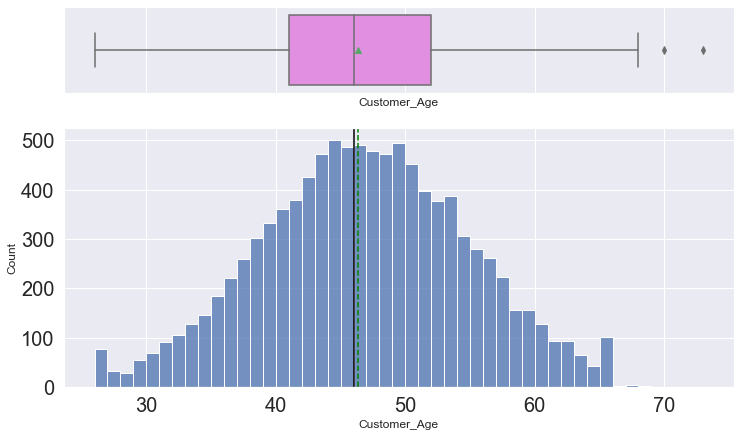

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(data, "Customer_Age")

- Customer_Age is evenly distibuted
- There are 2 outliers in Customer_Age

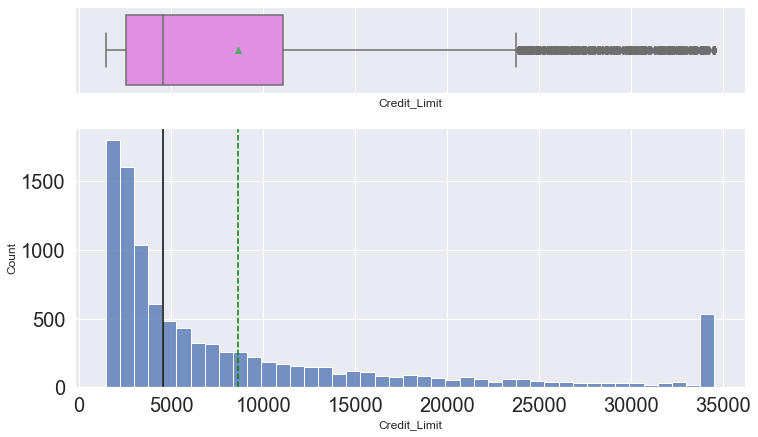

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(data, "Credit_Limit")

- Credit limit is right skewed and has outliers

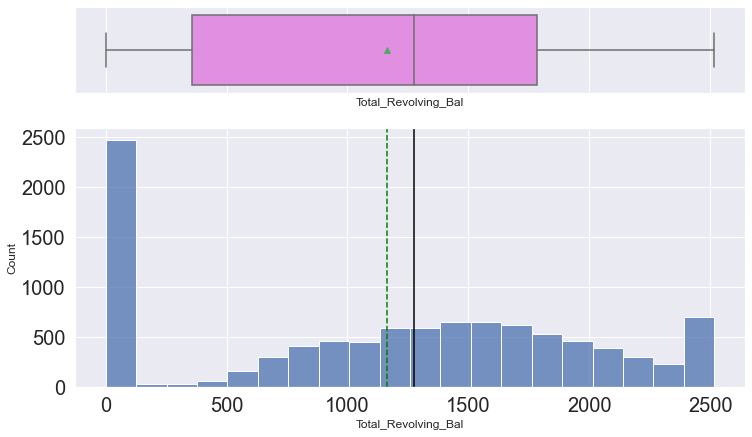

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data, "Total_Revolving_Bal")

- Total_Revolving_Bal data is almost evenly distributed with spikes for 0 and 2500

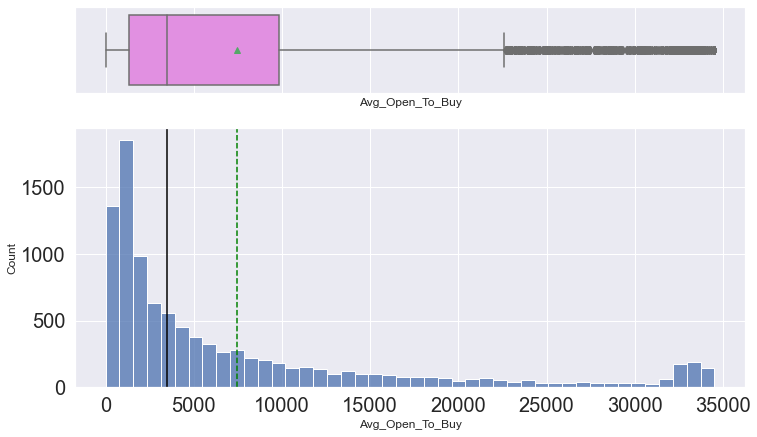

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data, "Avg_Open_To_Buy")

- Avg_Open_To_Buy is right skewed and hs hiutliers
- Avg_Open_To_Buy sdistibution looks similar to Credit_Limit

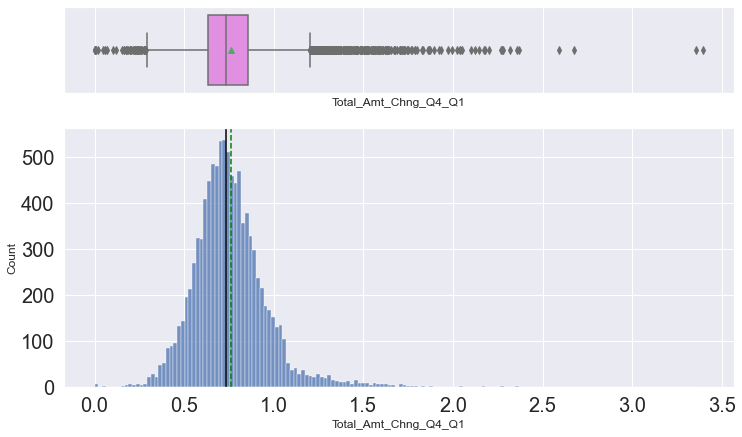

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data, "Total_Amt_Chng_Q4_Q1")

- Total_Amt_Chng_Q4_Q1 data haas outliers on both sides

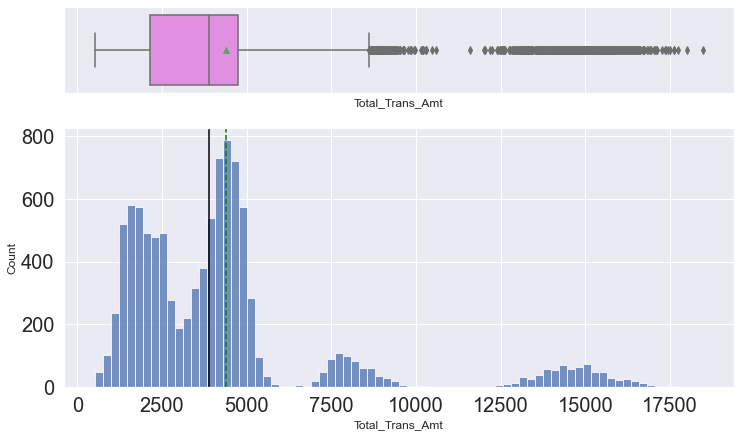

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data, "Total_Trans_Amt")

- Total_Trans_Amt data is right skewed
- Thre are outliers on the right side

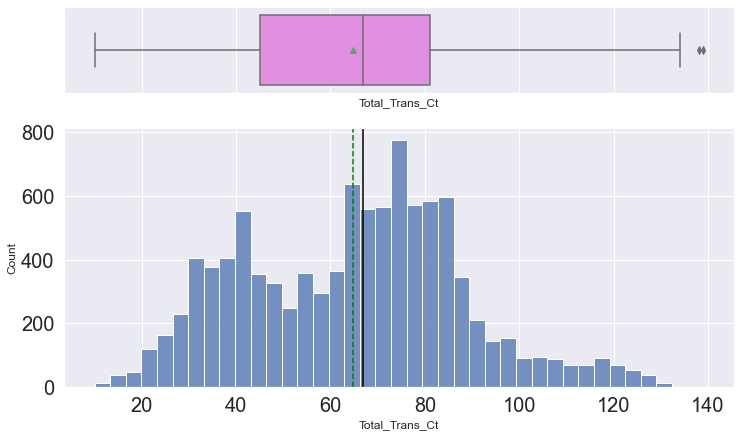

<IPython.core.display.Javascript object>

In [29]:
histogram_boxplot(data, "Total_Trans_Ct")

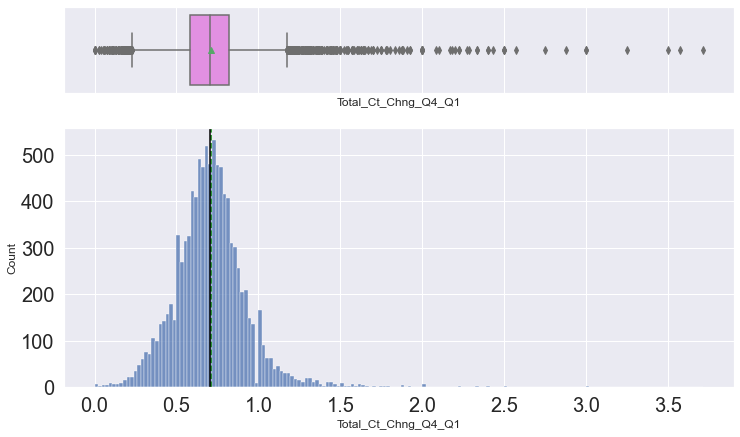

<IPython.core.display.Javascript object>

In [30]:
histogram_boxplot(data, "Total_Ct_Chng_Q4_Q1")

- Total_Ct_Chng_Q4_Q1  data is right skewed with bunch of outliers

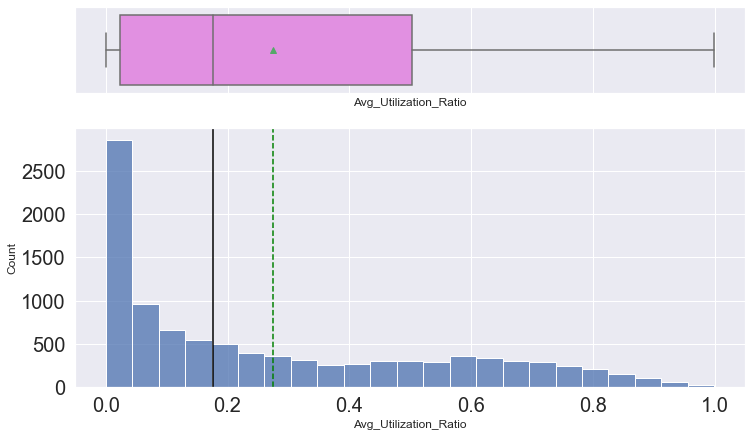

<IPython.core.display.Javascript object>

In [31]:
histogram_boxplot(data, "Avg_Utilization_Ratio")

 - Most customers have Avg_Utilization_Ratio of 0
 - Avg_Utilization_Ratio data is right skewed
 - No outliers

In [32]:
data.describe(include="object").T

count unique             top  freq
Attrition_Flag            10127      2               0  8500
Gender                    10127      2               F  5358
Dependent_count           10127      6               3  2732
Education_Level            8608      6        Graduate  3128
Marital_Status             9378      3         Married  4687
Income_Category            9015      5  Less than $40K  3561
Card_Category             10127      4            Blue  9436
Total_Relationship_Count  10127      6               3  2305
Months_Inactive_12_mon    10127      7               3  3846
Contacts_Count_12_mon     10127      7               3  3380

<IPython.core.display.Javascript object>

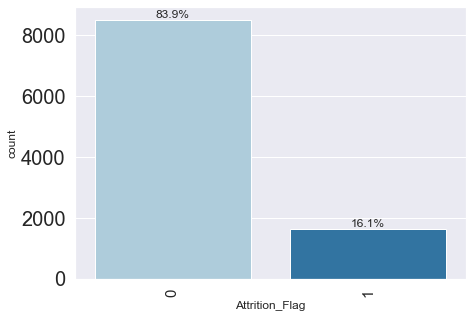

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(data, "Attrition_Flag", perc=True)

- 16. 1% customers are atteried

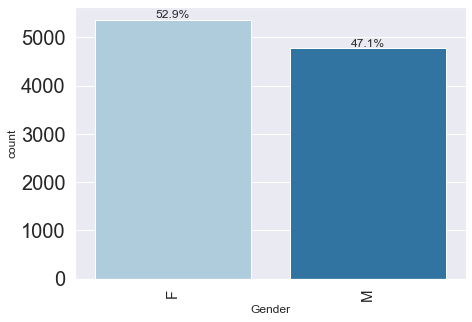

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(data, "Gender", perc=True)

- More number of customers are Female

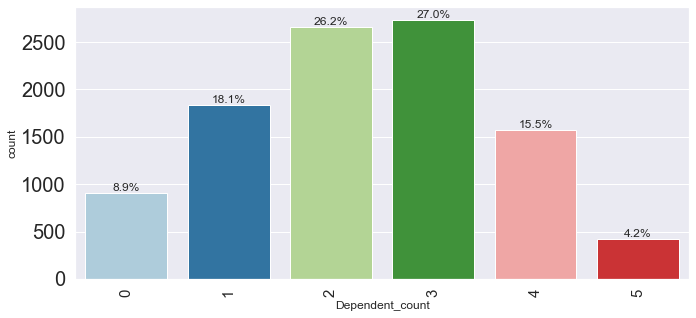

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(data, "Dependent_count", perc=True)

- Most of the customers have 2 to 3 dependents
- only 4.2% customers have 5 dependents

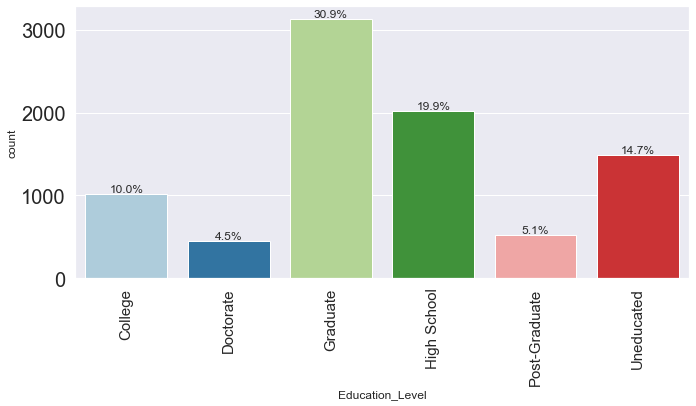

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(data, "Education_Level", perc=True)

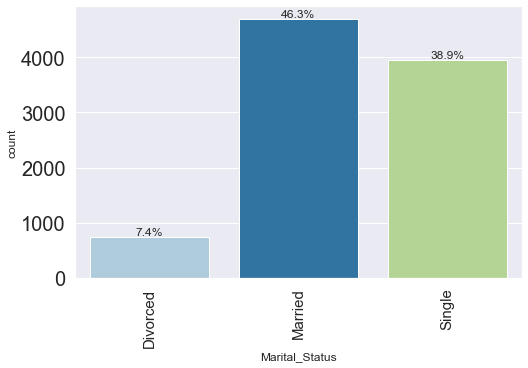

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(data, "Marital_Status", perc=True)

- 46.3% customers are Married 

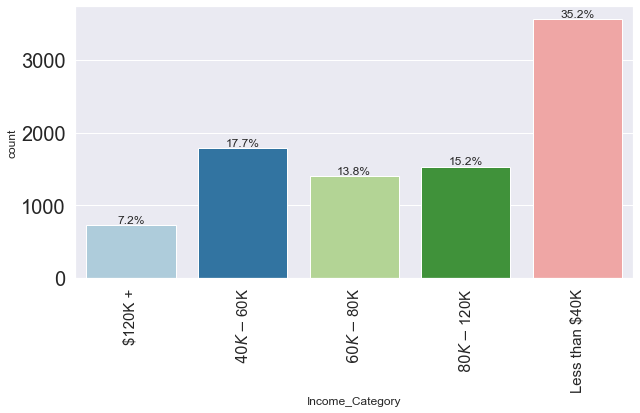

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(data, "Income_Category", perc=True)

- 35.2% cusstomers are have less than $40K income

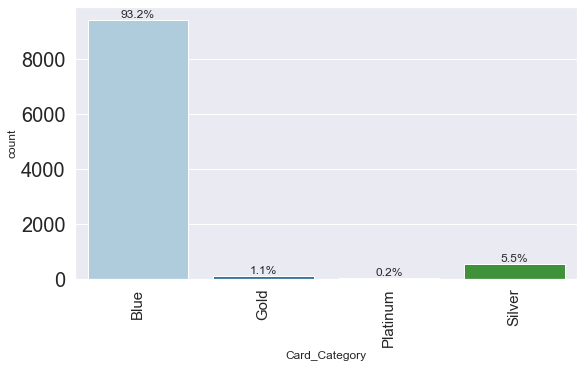

<IPython.core.display.Javascript object>

In [39]:
labeled_barplot(data, "Card_Category", perc=True)

- 93.2% customers are Blue card holders

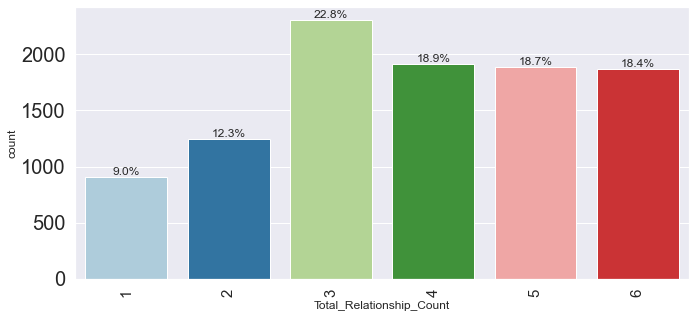

<IPython.core.display.Javascript object>

In [40]:
labeled_barplot(data, "Total_Relationship_Count", perc=True)

- Most of the customers hold more than 2 products

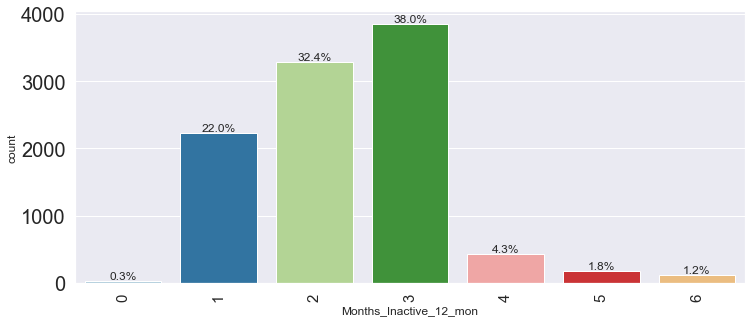

<IPython.core.display.Javascript object>

In [41]:
labeled_barplot(data, "Months_Inactive_12_mon", perc=True)

- 38% customers were inactive for 3 months in laast 12 months

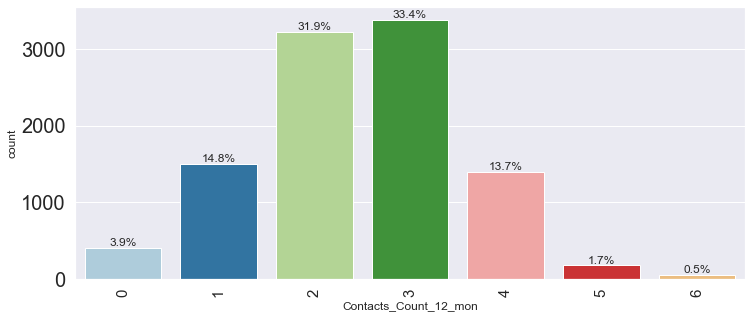

<IPython.core.display.Javascript object>

In [42]:
labeled_barplot(data, "Contacts_Count_12_mon", perc=True)

- 33.4% customers had contacted the bank 3 times in last 12 months

## Bivariate Analysis

Lets take a look at the correlations between the non-categorical columns

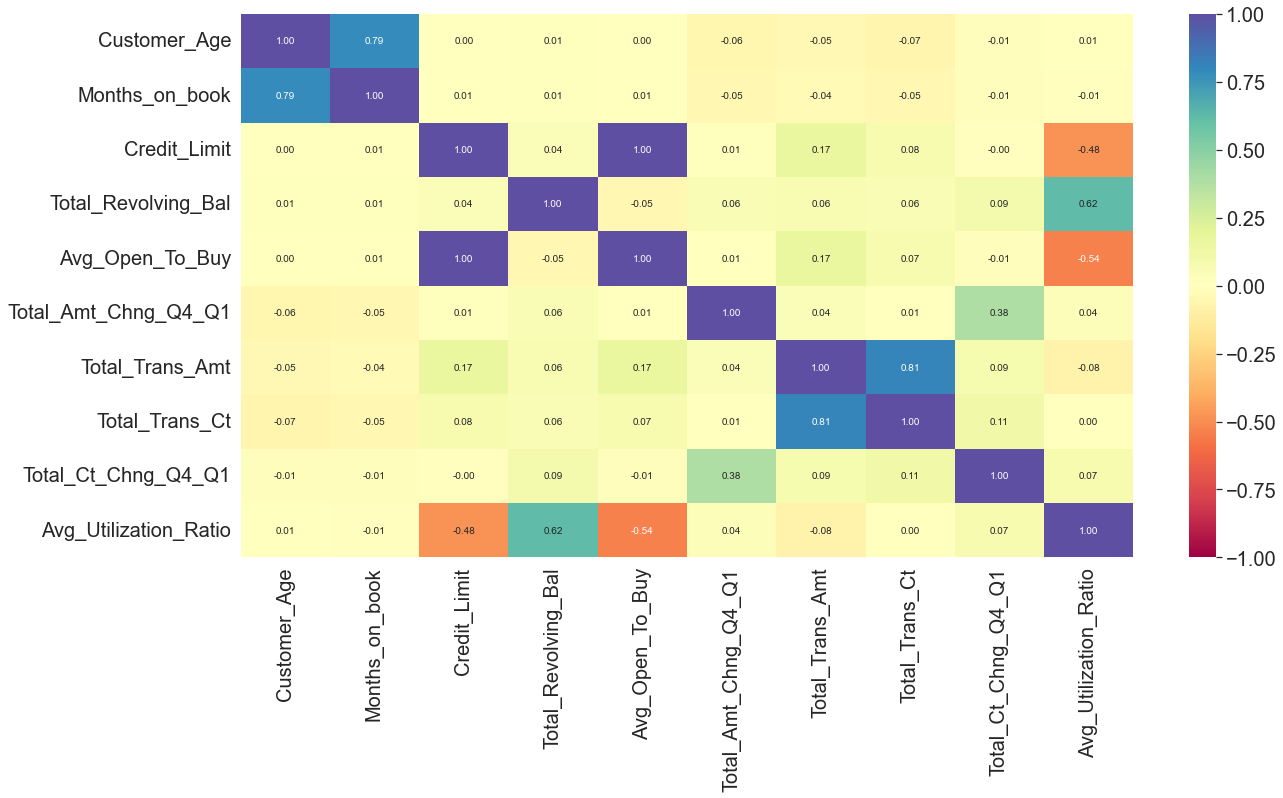

<IPython.core.display.Javascript object>

In [43]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

- Credit_Limit and Avg_Open_To_Buy are directly correlated 
- Total_Trans_Amt and Total_Trans_Ct are strongly correlated  

In [44]:
data.drop("Avg_Open_To_Buy", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [45]:
data.drop("Total_Trans_Ct", axis=1, inplace=True)

<IPython.core.display.Javascript object>

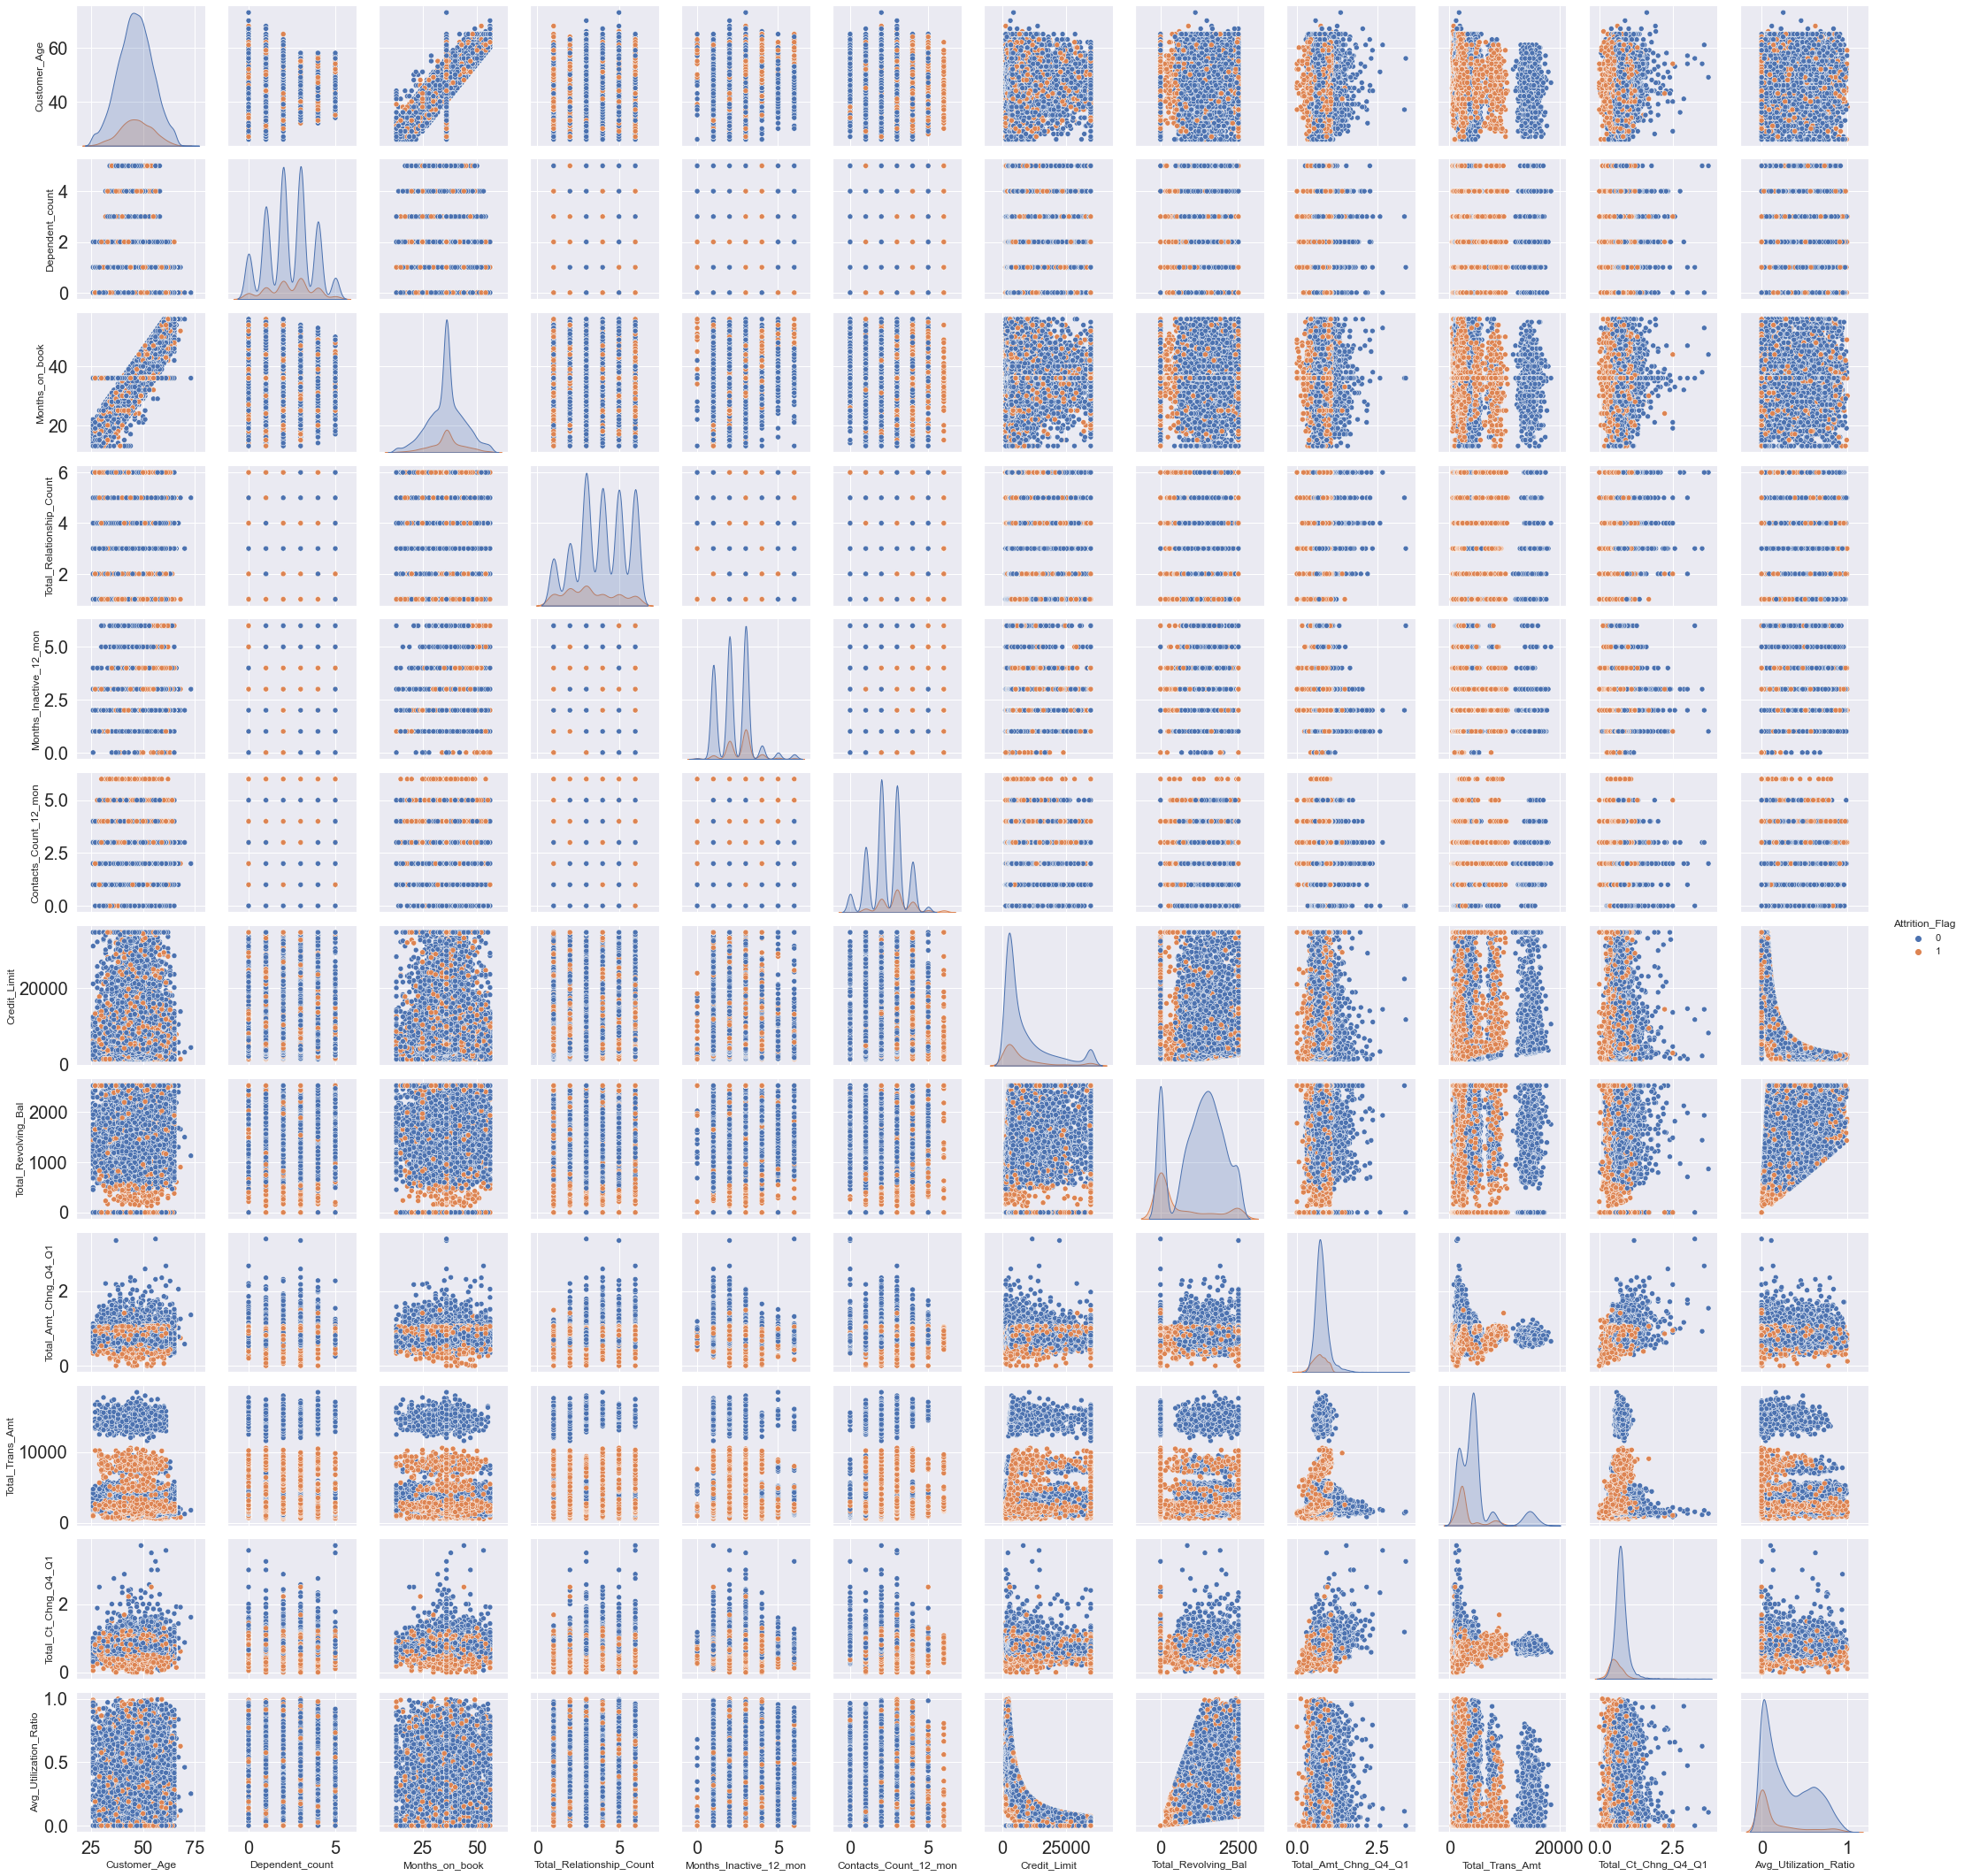

<IPython.core.display.Javascript object>

In [46]:
sns.pairplot(data, hue="Attrition_Flag")
plt.show()

Attrition_Flag     0     1    All
Card_Category                    
All             8500  1627  10127
Blue            7917  1519   9436
Silver           473    82    555
Gold              95    21    116
Platinum          15     5     20
---------------------------------------------------------------------------


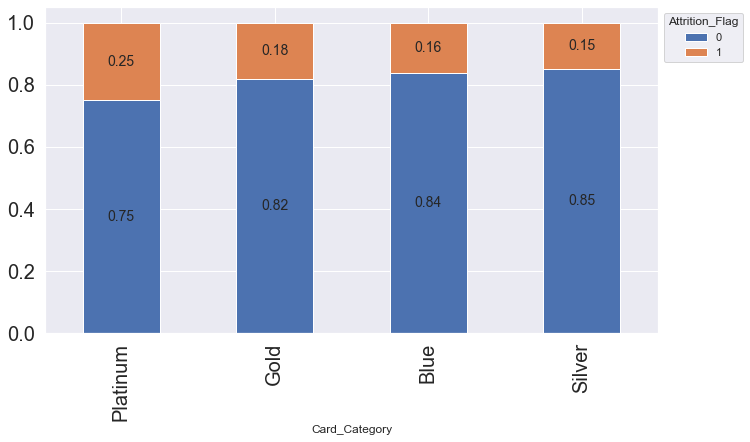

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(data, "Card_Category", target="Attrition_Flag")

### Data Preparation for Modeling

### Split data

In [48]:
df = data.copy()

<IPython.core.display.Javascript object>

In [49]:
X = df.drop(["Attrition_Flag"], axis=1)
y = df["Attrition_Flag"].astype("int")

<IPython.core.display.Javascript object>

In [50]:
# Splitting data into training, validation and test sets:
# first we split data into 2 parts, say temporary and test
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6075, 17) (2026, 17) (2026, 17)


<IPython.core.display.Javascript object>

### Missing-Value Treatment

* We will use mode to impute missing values in Education_Level, Marital_Status, and Income_Category columns.

In [51]:
# Let's impute the missing values
imp_mode = SimpleImputer(missing_values=np.nan, strategy="most_frequent")
cols_to_impute = ["Education_Level", "Marital_Status", "Income_Category"]

# fit and transform the imputer on train data
X_train[cols_to_impute] = imp_mode.fit_transform(X_train[cols_to_impute])

# Transform on validation and test data
X_val[cols_to_impute] = imp_mode.transform(X_val[cols_to_impute])

# transform the imputer on test data
X_test[cols_to_impute] = imp_mode.transform(X_test[cols_to_impute])

<IPython.core.display.Javascript object>

In [52]:
# Creating dummy variables for categorical variables
X_train = pd.get_dummies(data=X_train, drop_first=True)
X_val = pd.get_dummies(data=X_val, drop_first=True)
X_test = pd.get_dummies(data=X_test, drop_first=True)

<IPython.core.display.Javascript object>

## Model evaluation criterion
### We will be using Recall as a metric for our model performance


In [53]:
## Function to create confusion matrix
def make_confusion_matrix(model, X_actual, y_actual, labels=[1, 0]):
    """
    model : classifier to predict values of X
    y_actual : ground truth

    """
    y_predict = model.predict(X_actual)
    cm = metrics.confusion_matrix(y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(
        cm,
        index=[i for i in ["Actual - No", "Actual - Yes"]],
        columns=[i for i in ["Predicted - No", "Predicted - Yes"]],
    )
    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten() / np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    plt.figure(figsize=(7, 5))
    sns.heatmap(df_cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

In [54]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(
    model_name,
    model,
    X_train_set,
    Y_train_set,
    X_val_set,
    Y_val_set,
    X_test_set,
    Y_test_set,
    print_scores=False,
    scores=["Recall"],
):
    """
    model : classifier to predict values of X

    """
    scores = [s.title() for s in scores]

    # defining an empty list to store train and test results
    score_dict = {"Model Name": model_name}

    # Predicting on train and tests
    pred_train = model.predict(X_train_set)
    pred_val = model.predict(X_val_set)
    pred_test = model.predict(X_test_set)

    if "Accuracy" in scores:
        # Accuracy of the model
        train_acc = model.score(X_train_set, Y_train_set)
        score_dict["Train Accuracy"] = train_acc

        val_acc = model.score(X_val_set, Y_val_set)
        score_dict["Val Accuracy"] = val_acc

        test_acc = model.score(X_test_set, Y_test_set)
        score_dict["Test Accuracy"] = test_acc

    if "Recall" in scores:
        # Recall of the model
        train_recall = metrics.recall_score(Y_train_set, pred_train)
        score_dict["Train Recall"] = train_recall

        val_recall = metrics.recall_score(Y_val_set, pred_val)
        score_dict["Val Recall"] = val_recall

        test_recall = metrics.recall_score(Y_test_set, pred_test)
        score_dict["Test Recall"] = test_recall

    if "Precision" in scores:
        # Precision of the model
        train_precision = metrics.precision_score(Y_train_set, pred_train)
        score_dict["Train Precision"] = train_precision

        val_precision = metrics.precision_score(Y_val_set, pred_val)
        score_dict["VAL Precision"] = val_precision

        test_precision = metrics.precision_score(Y_test_set, pred_test)
        score_dict["Test Precision"] = test_precision

    if "F1" in scores:
        # F1 score of the model
        train_f1 = metrics.f1_score(Y_train_set, pred_train)
        score_dict["Train F1"] = train_f1

        val_f1 = metrics.f1_score(Y_val_set, pred_val)
        score_dict["Val F1"] = val_f1

        test_f1 = metrics.f1_score(Y_test_set, pred_test)
        score_dict["Test F1"] = test_f1

    # If the flag is set to True then only the following print statements will be dispayed.
    # The default value is set to False.
    if print_scores == True:
        print(json.dumps(score_dict, indent=4))

    return score_dict  # returning the dict with train and test scores

<IPython.core.display.Javascript object>

## Base Models

In [55]:
models = []  # Empty list to store all the models
score_list = []
results = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models

# Appending models into the list
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1)))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Xgboost", XGBClassifier(random_state=1, eval_metric="logloss")))
models.append(("dtree", DecisionTreeClassifier(random_state=1)))

# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))

for name, model in models:
    model.fit(X_train, y_train)
    scores = get_metrics_score(
        name,
        model,
        X_train,
        y_train,
        X_val,
        y_val,
        X_test,
        y_test,
    )
    score_list.append(scores)


Cross-Validation Performance:

Bagging: 69.56357927786499
Random forest: 61.47357404500262
GBM: 74.89481946624804
Adaboost: 72.23024594453165
Xgboost: 81.4531658817373
dtree: 69.15698587127159


<IPython.core.display.Javascript object>

## Oversampled Data

In [56]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique)
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [57]:
models_SMOTE = []
# Appending models into the list
models_SMOTE.append(("Bagging_SMOTE", BaggingClassifier(random_state=1)))
models_SMOTE.append(("Random forest_SMOTE", RandomForestClassifier(random_state=1)))
models_SMOTE.append(("GBM_SMOTE", GradientBoostingClassifier(random_state=1)))
models_SMOTE.append(("Adaboost_SMOTE", AdaBoostClassifier(random_state=1)))
models_SMOTE.append(
    ("Xgboost_SMOTE", XGBClassifier(random_state=1, eval_metric="logloss"))
)
models_SMOTE.append(("dtree_SMOTE", DecisionTreeClassifier(random_state=1)))

# results = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models
# score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_SMOTE:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_over, y=y_train_over, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))


# score_list_SMOTE = []

for name, model in models_SMOTE:
    model.fit(X_train, y_train)
    scores = get_metrics_score(
        name,
        model,
        X_train_over,
        y_train_over,
        X_val,
        y_val,
        X_test,
        y_test,
    )
    score_list.append(scores)


Cross-Validation Performance:

Bagging_SMOTE: 94.72450884180952
Random forest_SMOTE: 94.66593546152512
GBM_SMOTE: 95.99944197502357
Adaboost_SMOTE: 94.80317112124534
Xgboost_SMOTE: 96.99944197502356
dtree_SMOTE: 93.64578883565201


<IPython.core.display.Javascript object>

## Undersampled Data

In [58]:
# fit random under sampler on the train data
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)

<IPython.core.display.Javascript object>

In [59]:
models_rus = []
# Appending models into the list
models_rus.append(("Bagging_rus", BaggingClassifier(random_state=1)))
models_rus.append(("Random forest_rus", RandomForestClassifier(random_state=1)))
models_rus.append(("GBM_rus", GradientBoostingClassifier(random_state=1)))
models_rus.append(("Adaboost_rus", AdaBoostClassifier(random_state=1)))
models_rus.append(("Xgboost_rus", XGBClassifier(random_state=1, eval_metric="logloss")))
models_rus.append(("dtree_rus", DecisionTreeClassifier(random_state=1)))

# results = []  # Empty list to store all model's CV scores
# names = []  # Empty list to store name of the models
# score = []
# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Performance:" "\n")
for name, model in models_rus:
    scoring = "recall"
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train_un, y=y_train_un, scoring=scoring, cv=kfold
    )
    results.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean() * 100))


# score_list_rus = []

for name, model in models_rus:
    model.fit(X_train, y_train)
    scores = get_metrics_score(
        name,
        model,
        X_train_un,
        y_train_un,
        X_val,
        y_val,
        X_test,
        y_test,
    )
    score_list.append(scores)


Cross-Validation Performance:

Bagging_rus: 89.44688644688645
Random forest_rus: 89.24332810047095
GBM_rus: 92.93040293040293
Adaboost_rus: 88.11512297226584
Xgboost_rus: 93.0319204604919
dtree_rus: 85.34746206174776


<IPython.core.display.Javascript object>

In [60]:
pd.DataFrame(score_list).set_index("Model Name").sort_values(
    by="Val Recall", ascending=False
)

Train Recall  Val Recall  Test Recall
Model Name                                                
Xgboost_SMOTE            0.916650    0.846626     0.883077
Xgboost_rus              1.000000    0.846626     0.883077
Xgboost                  1.000000    0.846626     0.883077
Bagging                  0.975410    0.785276     0.747692
Bagging_SMOTE            0.842714    0.785276     0.747692
Bagging_rus              0.975410    0.785276     0.747692
GBM                      0.816598    0.782209     0.778462
GBM_rus                  0.816598    0.782209     0.778462
GBM_SMOTE                0.741910    0.782209     0.778462
dtree_SMOTE              0.838988    0.776074     0.744615
dtree_rus                1.000000    0.776074     0.744615
dtree                    1.000000    0.776074     0.744615
Adaboost_rus             0.751025    0.733129     0.760000
Adaboost                 0.751025    0.733129     0.760000
Adaboost_SMOTE           0.734262    0.733129     0.760000
Random forest            1.000000    0.687117     0.643077
Random forest_SMOTE      0.788390    0.687117     0.643077
Random forest_rus        1.000000    0.687117     0.643077

<IPython.core.display.Javascript object>

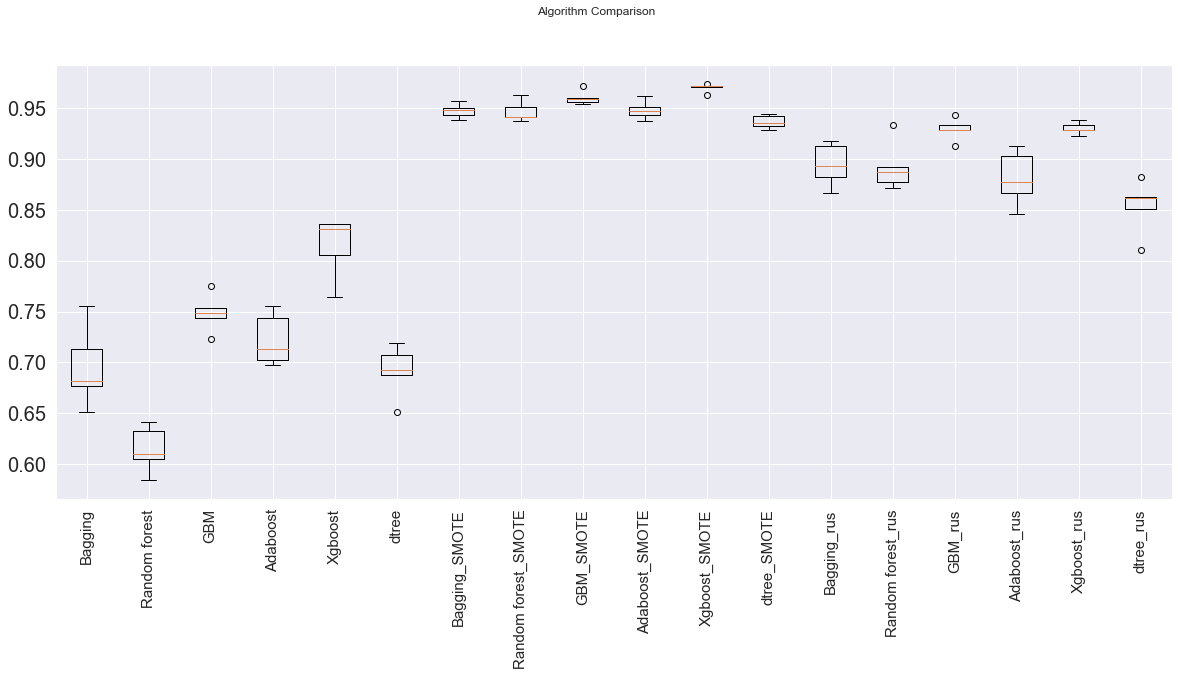

<IPython.core.display.Javascript object>

In [61]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(20, 8))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results)
ax.set_xticklabels(names)
plt.xticks(rotation=90, fontsize=15)

plt.show()

- We can see that the xgboost_SMOTE is giving the highest cross-validated recall followed by xgboost_rus and then xgboost
- The boxplot shows that the performance of these models are consistent and their performance on the validation set is also good
- We will tune the best three models i.e. xgboost_SMOTE, xgboost_rus tree and xgboost and see if the performance improves 